<h1> 어제 오른 내 주식, 과연 내일은? <h1>
    
## 학습 목표
    
---
    
- 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.
- ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.
- 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.

## 목차
    
--- 
    
### 시계열 예측이란

- 미래를 예측한다는 것은 가능할까?
- Stationary한 시계열 데이터란?
- 시계열 데이터 사례분석
- Stationary 여부를 체크하는 통계적 방법

### ARIMA 시계열 예측

- 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
- ARIMA 모델의 개념
- ARIMA 모델 훈련과 추론

### 프로젝트 : 주식 예측에 도전해 보자
    
## 시계열 예측이란(1) 미래를 예측한다는 것은 가능할까?
    
미래 예측 시나리오를 생각해 봅시다.
    
- 지금까지의 주가변곡선을 바탕으로 다음 주가변동 예측
- 특정 지역의 기후데이터를 바탕으로 내일의 온도변화 예측
- 공장 센터데이터 변화이력을 토대로 이상 발생 예측
    
예측의 근거가 되는 시계열(Time-Series) 데이터가 있다는 것이다. 

시계열이란 시간 순서대로 발생한 데이터의 수열이라는 뜻이다. 굳이 간단한 수식의 형태를 빌리자면 아래와 같이 표현될 것이다.

Y = 
{
Y
t
:
t
∈
T
}
, where 
T
 is the index set
    
일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아니다. 
    
매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 되며, 이때 날짜가 인덱스(index) 역할을 하게 된다.

미래의 데이터를 예측하려 든다면 적어도 다음 두 가지의 전제가 필요

- 과거의 데이터에 일정한 패턴이 발견된다.
- 과거의 패턴은 미래에도 동일하게 반복될 것이다.

즉  안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다. - 안정적(Stationary)이다는 것은 시계열 데이터의 통계적 특성이 변하지 않는다는 뜻

시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않는데, 어떤 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성(stationarity)이 훼손될 여지가 있기 때문이다다. 그럼에도 불구하고, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보인다.

## 시계열 예측이란(2) Stationary한 시계열 데이터

안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지는 평균, 분산, 공분산(정확히는 자기공분산-autocovariance이라고 해야 함) 이며 현실적으로 다루는 시계열 데이터는 이런 직관적인 안정성의 정의를 만족하는 정도면 충분히 ARIMA 등의 시계열 모델을 통해 분석이 용이하다다.

### 예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.

이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다는 점이다.

t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면 이 모델에 t=2020을 대입해도 이 모델이 X(2021)을 정확하게 예측할 수 있어야 한다는 것이다.

그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 하하며,또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야 한다.

그렇지 않으면 우리의 시계열 예측은 t에 따라 달라지는, 그때그때 달라요 예측이 되며, 이것은 과거의 패턴이 미래에도 반복될 것이다 라는 시계열 예측의 대전제를 무너뜨린다.

## 시계열 예측이란(3) 시계열 데이터 사례분석

데이터를 준비

$ mkdir -p ~/aiffel/EXPLORATION/14/stock_prediction

$ ln -s ~/data/ ~/aiffel/EXPLORATION/14/stock_prediction

### 시계열(Time Series) 생성

첫 번째로 다루어볼 데이터는 Daily Minimum Temperatures in Melbourne 이다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


시계열(Time Series)이란 것도 결국 시간 컬럼을 index로 하는 Series로 표현된다. 

우리가 읽어 들인 데이터 파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었다.

DataFrame에서 Date 컬럼을 index로 삼아 시계열을 생성해 봅시다.

In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나오는데, 우리가 찾는 시계열은 바로 여기 있다.

In [4]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 주지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행한다.

### 시계열 안정성의 정성적 분석

시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인

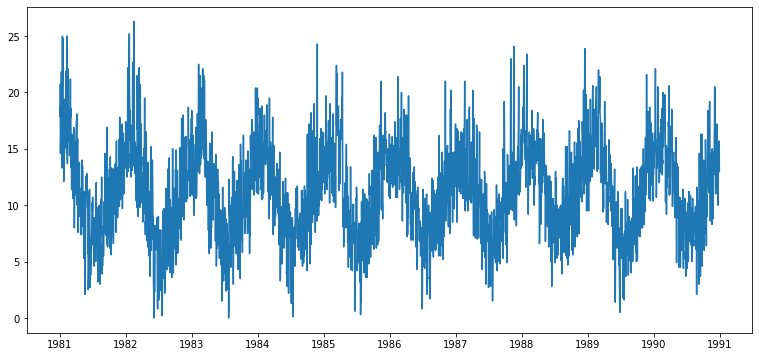

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

분석에 들어가기 전에 잊지 말아야 할 단계가 하나 있는데, 바로 결측치 유무 확인 이다.

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석결과에도 악영향을 미치기 때문에 결측치가 있다면 조치가 필요하다.

만약 결측치가 있다면, 두가지 방법으로 결측치를 처리해 줄 수 있다.

- 결측치가 있는 데이터를 모두 삭제(drop)

- 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식

이번에는 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택할것이다.

Pandas에서 결측치 보간을 처리하는 메소드는 다음과 같다. 

Series([], Name: Temp, dtype: float64)


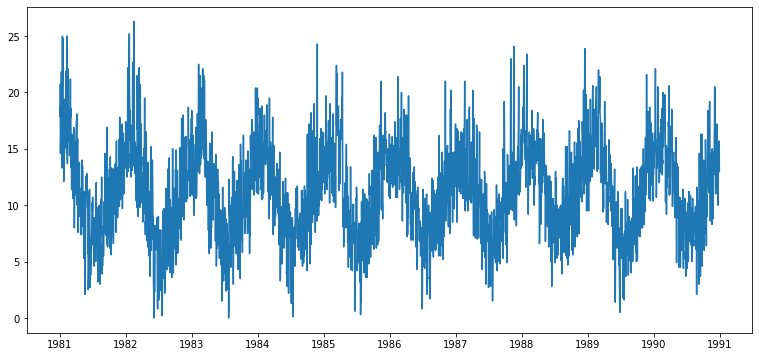

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같지만, 시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화해 보자.

아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다.

현재 타임스텝 부터 window에 주어진 타임스텝 이전 사이

- 구간의 평균(rolling mean, 이동평균)과
- 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다.

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


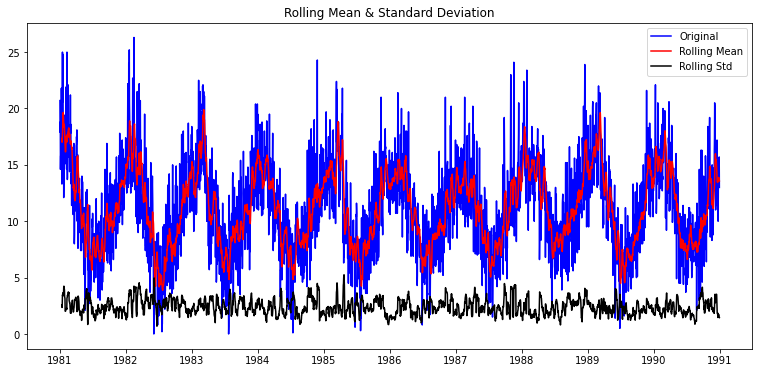

In [9]:
plot_rolling_statistics(ts1, window=12)

시각화한 결과를 보면 시계열 데이터가 안정적이라 볼수 있지만, 명확하게 단정지으려면 좀더 통계적인 접근이 필요하다. 

### 다른 데이터에 대해서도 비교해 보자.

이번에는 International airline passengers 데이터셋입니다. 월별 항공 승객 수(천명 단위)의 시계열 데이터인데 기온 변화 데이터셋과는 좀 다른 패턴이 나타나지 않을까 예상된다. 동일한 방법으로 분석해 보면

In [10]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


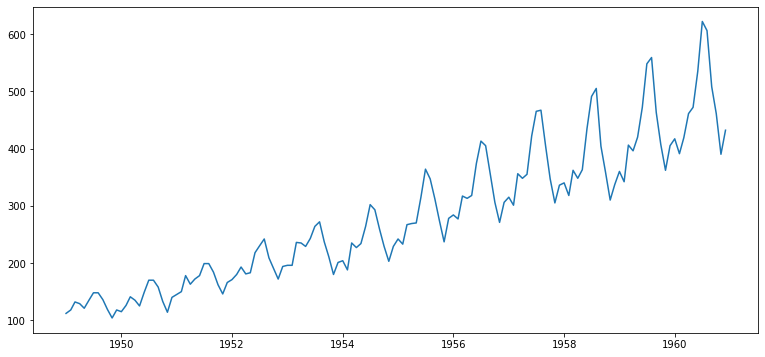

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

직관적으로 봐도 온도변화 데이터셋과는 다른 패턴이 보인다. 

시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보입니다. rolling statistics를 추가해서 시각화해 보면..

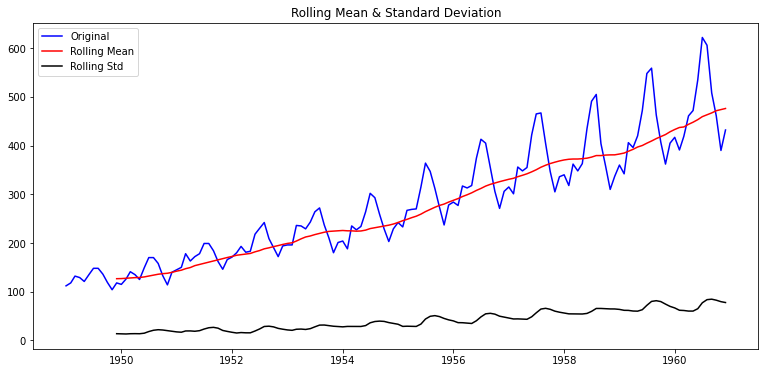

In [12]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것이다. 

그렇다면 이런 시계열 데이터에 대해서는 시계열 예측을 시도할 수 없는 것일까요? 

이후 스텝들에는 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어 볼 것입니다.

위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 보았으며, 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있다.

하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있다. 

## 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법



**Augmented Dickey-Fuller Test**

--- 

Augmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법은

1.주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,

2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에

3. 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다는 내용입니다.

시계열 분석은 탄탄한 통계학적 기반에 입각한 만큼 제대로 이해하기 위해서는 전문적인 훈련이 필요하다.

그래서 ADF Test의 세부 알고리즘은 우선 생략하고😉, statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 손쉽게 ADF Test의 결과를 이용할 것이다. 🤗

하지만 세부 알고리즘을 좀더 파악하고 싶으시다면 Unit Root Test의 개념으로부터 ADF Test에 대한 설명으로 이어지는 이 글을 추천하며며, 통계적 가설 검정의 기본 개념을 이루는 p-value 등의 용어에 대해서는 한 번쯤 짚고 넘어가는 것이 이후 과정의 이해를 도울 것이라고 생각된다. 

**statsmodels 패키지와 adfuller 메소드**

--- 

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지다. 

아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드다.


In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 보면..

In [14]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났기 때문에 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택된다.

In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났다.

p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아니지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없다.

## 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보면, 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 한다.

안정적인 시계열로 바꾸는 방법이 크게 두 가지가 있는데...

- 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
- 시계열 분해(Time series decomposition) 기법을 적용

### 1. 보다 Stationary한 시계열로 가공해 가기

#### 1-1. 로그함수 변환

가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점으로로, 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 된다.

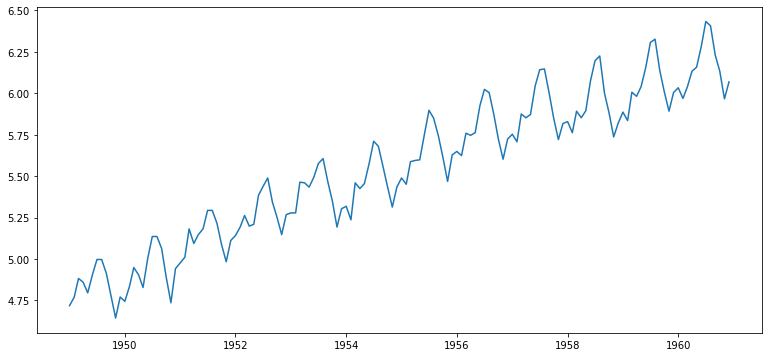

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행해 보자.

In [17]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었는데, 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있다. 

아주 효과적인 변환이었던 것 같지만 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점이다.

#### 1-2. Moving average 제거 - 추세(Trend) 상쇄하기

시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 하며, 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주는 방법이 좋을것 같다.

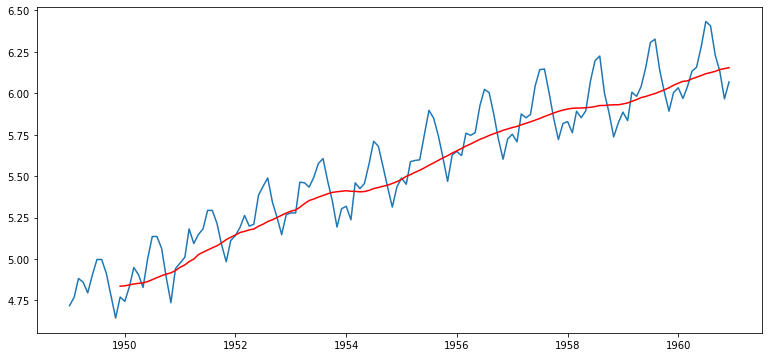

In [18]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점이다.

이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줄것이다.

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메소드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 보면...

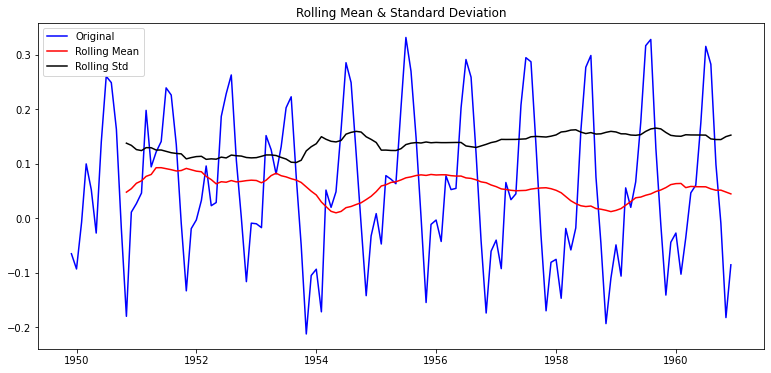

In [21]:
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었으며, 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있다.

그러나 지금까지의 접근에서 한가지 숨겨진 문제점이 있는데,바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점이다.

만약 위 코드에서 window=6을 적용하면?

In [23]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


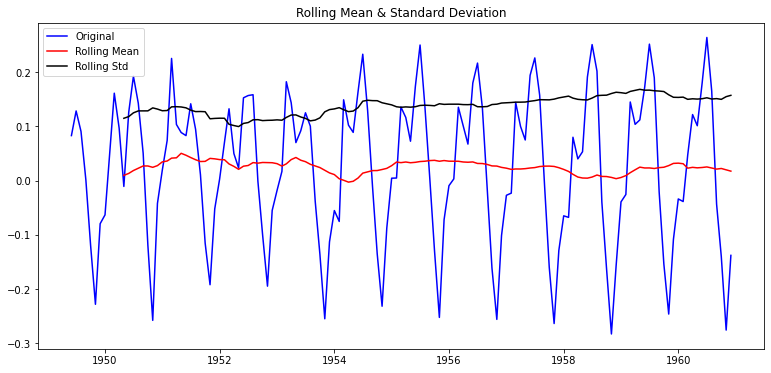

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같지만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억하자.

시간의 추이에 따라 평균이 증가하는 trend를 제거하였으나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있다.

#### 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소이며, 이것은 Moving Average 제거로는 상쇄되지 않는 효과라고 하는데 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 한다.

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있다. 마치 미분(Differentiation)을 떠올리게 하는 개념인데, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법이다. 

이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 된다.

시프트한 시계열과 원본 시계열에 대한 그래프를 그려보면...

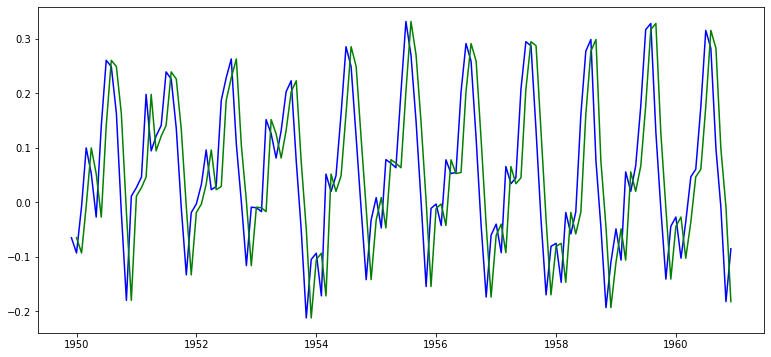

In [26]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 보면..

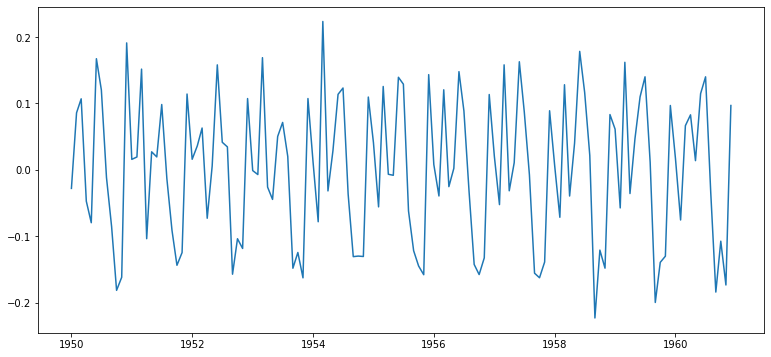

In [27]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 보면..

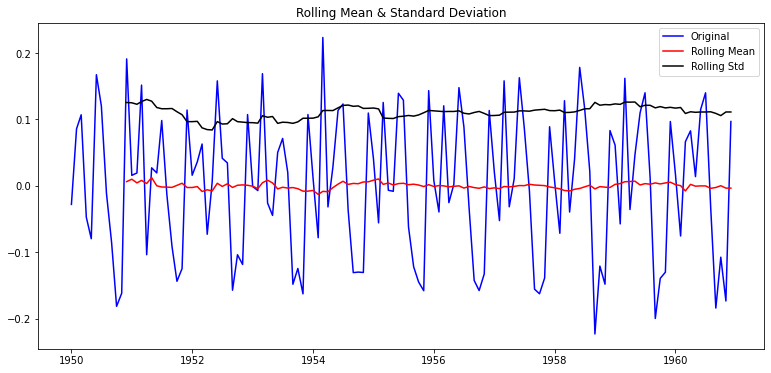

In [28]:
plot_rolling_statistics(ts_log_moving_avg_diff)

차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 보면..

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었다 .

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모른다.

### 2. 시계열 분해(Time series decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있다. 

이 기능을 활용하면 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있다. 

위에서 구했던 로그변환 단계(ts_log)에서부터 시작해 보면...

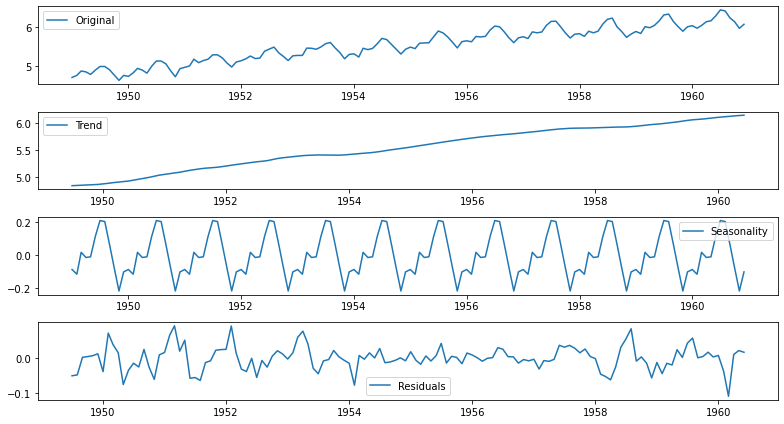

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 하는데데, 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻이다. 

이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 준다.

Residual에 대해 안정성 여부를 따져 보면...

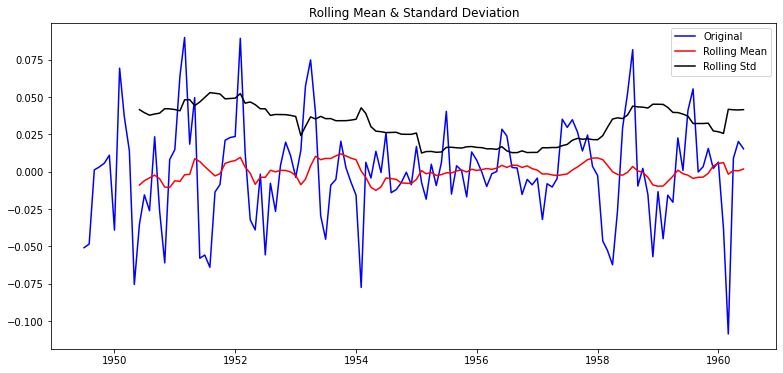

In [31]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

## ARIMA 모델의 개념

### 1. ARIMA 모델의 정의

앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인했으며, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였다.

ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있는데, 각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 된다.

시계열 데이터 Y = { Y<sub>t</sub>: t ∈ T } 를 생각해 봅시다. Y<sub>t</sub>를 예측하기 위해서 다음과 같은 모델들을 생각해 볼 수 있다.

#### 1-1. AR(자기회귀, Autoregressive)

![](https://github.com/MulderKim/EXPLORATION/blob/main/14/etc/E-16-2_nh8iD9A.max-800x600.png?raw=true)

- 과거 값들에 대한 회귀로 미래 값을 예측하는 방법
- Y<sub>t</sub>가 이전 p개의 데이터 Y<sub>t-1</sub>, Y<sub>t-2</sub>, ..., Y<sub>t-p</sub>의 가중합으로 수렴한다고 보는 모델
- Y<sub>t</sub> = ϕ<sub>0</sub> + ϕ<sub>1</sub>Y<sub>t-1</sub> + ϕ<sub>2</sub>Y<sub>t-2</sub> + .... + ϕ<sub>p</sub>Y<sub>t-p</sub> + e<sub>t</sub>
 
  - AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있습니다.

  - 가중치의 크기가 1보다 작은 Y<sub>t-1</sub>, Y<sub>t-2</sub>, ..., Y<sub>t-p</sub>의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.

  - 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.

#### 1-2. MA(이동평균, Moving Average)

![](https://github.com/MulderKim/EXPLORATION/blob/main/14/etc/E-16-3.max-800x600.png?raw=true)

- MA는 Y<sub>t</sub>가 이전 q개의 예측오차값 e<sub>t-1</sub>, e<sub>t-2</sub>, ..., e<sub>t-q</sub>의 가중합으로 수렴한다고 보는 모델입니다.

- Y<sub>t</sub> = μ + e<sub>t</sub> + θ<sub>1e<sub>t-1</sub></sub> + θ<sub>2e<sub>t-2</sub></sub> + .... + θ<sub>qe<sub>t-q</sub></sub>
 
  - MA는 시계열의 Trend에 해당하는 부분을 모델링한다고 볼 수 있습니다.

  - 예측오차값 e<sub>t-1</sub>이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻이므로, 다음 Y<sub>t</sub>예측 시에는 예측치를 올려잡게 됩니다.

  - 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점이라고 볼 수 있습니다.

#### 1-3. I(차분누적, Integration)

- I는 Y<sub>t</sub>이 이전 데이터와 dd차 차분의 누적(integration) 합이라고 보는 모델입니다.

  - I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.

  - 예를 들어 d=1d=1이라면 Y<sub>t</sub>는 Y<sub>t-1</sub>과 ΔY<sub>t-1</sub>의 합으로 보는 것입니다.
ARIMA는 위 3가지 모델을 모두 한꺼번에 고려합니다. 주식값을 예측하는 우리의 태도와 비슷하지 않나요?

위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때,

- '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와
- '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가
동시에 떠오르게 됩니다.

ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 줍니다.

### 2. ARIMA 모델의 모수 p, q, d

ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 잘 설정해야 한다. 핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다.

ARIMA의 모수는 아래의 3가지가 있다

- p : 자기회귀 모형(AR)의 시차
- q : 이동평균 모형(MA)의 시차
- d : 차분누적(I) 횟수

이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데, 이는 p 나 q 중 하나는 0이라는 뜻이다. 이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문이다.

그러면 모수 p, q, d는 어떻게 결정될까? 

ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 말할 수 있는데, 이 AutoCorrelation은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것이다.

**ACF**

- 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
- 주어진 시계열의 현재 값이 과거(y<sub>t-1}, y<sub>t-2}, ...., y<sub>t-n) 값과 어떻게 상관되는지 설명함.
- ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄

**PACF**

- 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
- k 이외의 모든 시차를 갖는 관측치(y<sub>t-1</sub>, y<sub>t-2</sub>, ...., y<sub>t-k+1</sub>)의 영향력을 배제한 가운데 특정 두 관측치, y<sub>t</sub> 와 y<sub>t-k</sub>가 얼마나 관련이 있는지 나타내는 척도.

**참고자료**

- 자기상관함수 및 편자기상관함수
- A Gentle Introduction to Autocorrelation and Partial Autocorrelation

International airline passengers 시계열을 예시를 들어 설명해보면, 우리는 statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것이다.

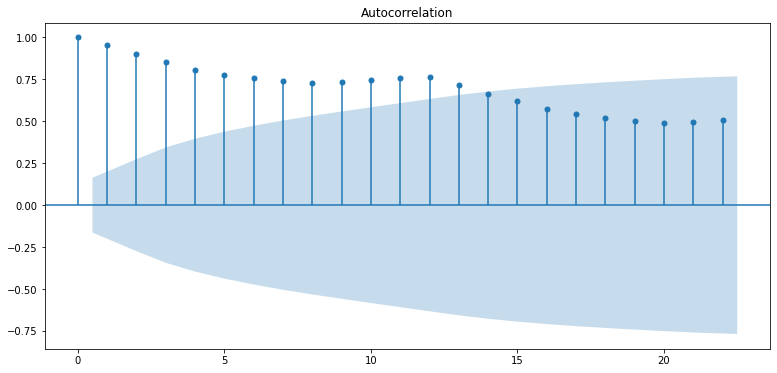

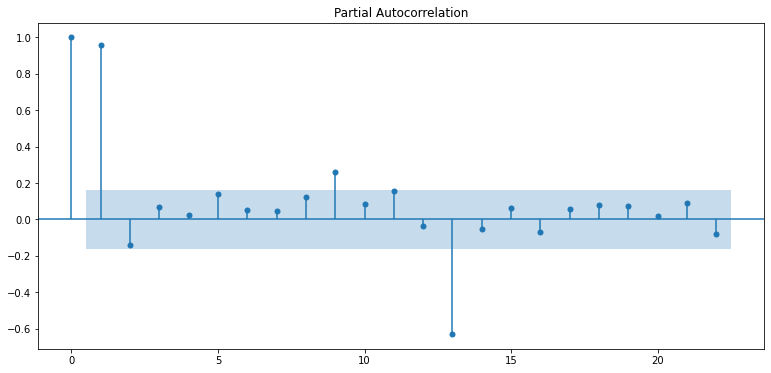

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 **ACF를 통해 MA 모델의 시차 q를 결정**하고, **PACF를 통해 AR 모델의 시차 p를 결정**할 수 있음을 통계학적으로 설명하는 아티클에서 요약결론 부분만 가져온 것이다.

![](https://github.com/MulderKim/EXPLORATION/blob/main/14/etc/E-16-4.max-800x600.png?raw=true)

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같은데, p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문이다. 

PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻이다.

반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있는데, q에 대해서는 적합한 값이 없어 보인다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋을것같다.

d를 구하기 위해서는 좀 다른 접근이 필요한데, d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 한다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


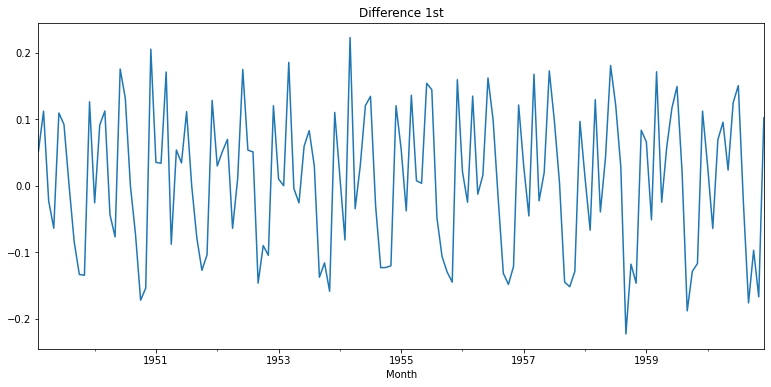

In [34]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


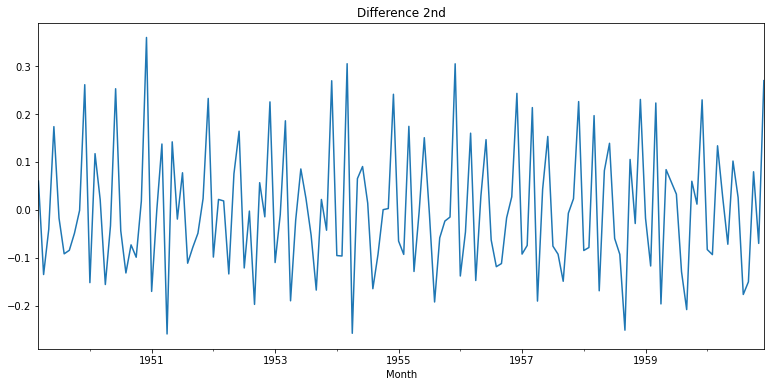

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였는데, 2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같다. d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.

### 3. 학습데이터 분리

시계열 데이터에서 학습 데이터와 테스트 데이터를 학습과 테스트에 9:1로 분리해 보자.

시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것이다.

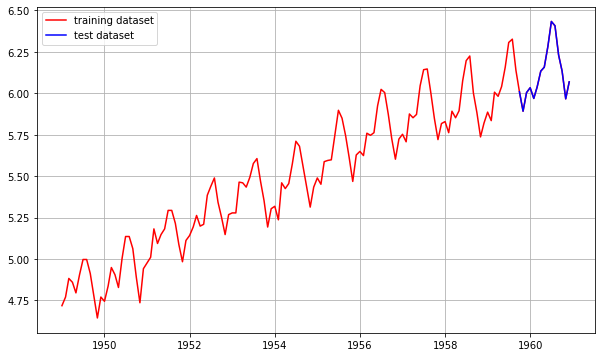

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [37]:
# 데이터셋의 형태를 확인해 봅시다.
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


## ARIMA 모델 훈련과 추론

앞에서 우리는 p=1, d=1, q=0을 모수로 가지는 ARIMA 모델을 사용하기로 하였는데 ARIMA 모델을 훈련하는 것은 아래와 같이 간단하다.

In [38]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.023
Method:                       css-mle   S.D. of innovations              0.104
Date:                Tue, 07 Sep 2021   AIC                           -210.046
Time:                        14:27:05   BIC                           -201.490
Sample:                    02-01-1949   HQIC                          -206.570
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0108      0.011      0.972      0.331      -0.011       0.033
ar.L1.D.Passengers     0.1754      0.088      1.994      0.046       0.003       0.348
                    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


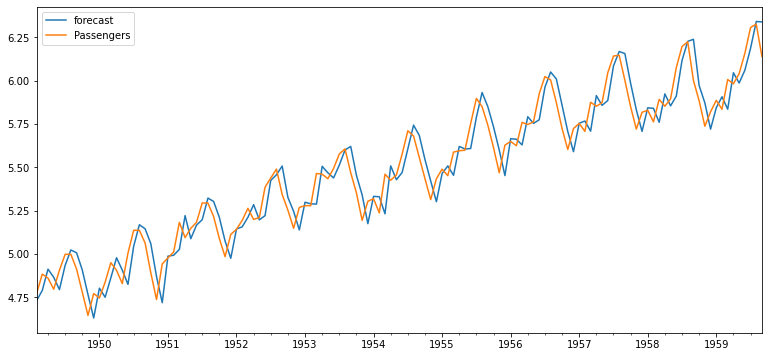

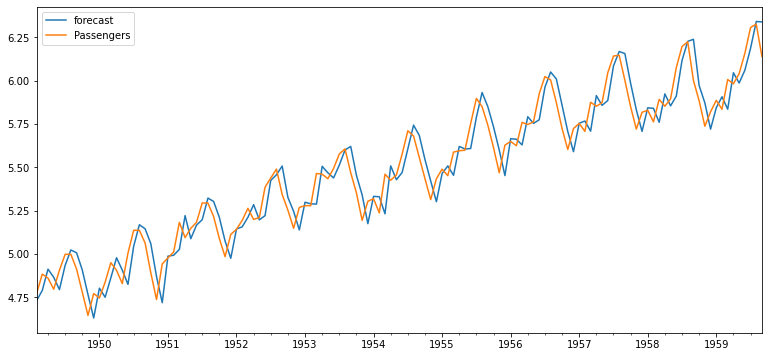

In [39]:
#ARIMA 모델이 훈련 결과를 시각적으로 확인해 보겠습니다.

fitted_m.plot_predict()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 보면...

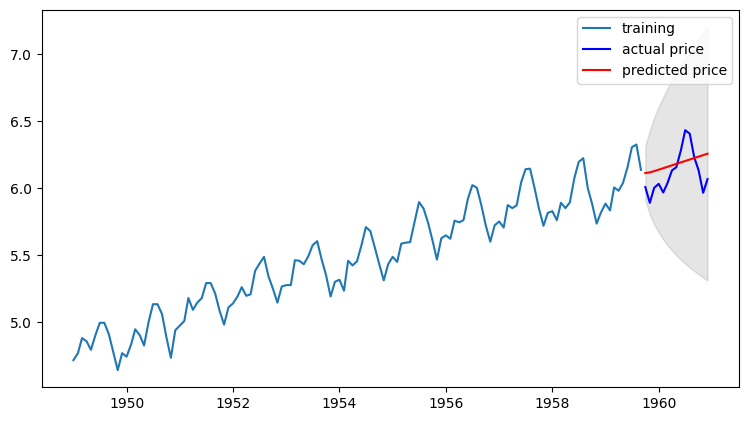

In [40]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있다. 

np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산한다.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5409.54978246723
MAE:  63.13692082580771
RMSE:  73.54964162025013
MAPE: 14.08%


최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 14% 정도의 오차율을 보인다. 썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지도 모른다. 

q=8을 줄 경우 MAPE가 10% 정도로 내려가기 때문에, q=12를 쓸 수 있다면 더욱 좋을 거라는 예상이 되지만 이번 경우 데이터셋이 너무 작아 쓸 수 없다.

## 프로젝트 : 주식 예측에 도전해 보자

ARIMA를 통해 시계열 데이터를 예측하는 과정을 진행해 보았다. 이제 실제 주식값 예측에 도전해 보자. 데이터는 과거의 일자별 시세입니다. 우선 대한민국 대장주 삼성전자에 대한 주식 시세를 예측해 보자.


![](https://github.com/MulderKim/EXPLORATION/blob/main/14/etc/E-16-5.max-800x600.png?raw=true)


Yahoo Finance에서 오늘 사용할 데이터셋을 다운로드할 수 있습니다.

하지만 이전 스텝을 차근차근 진행하셨다면, 이미 데이터셋이 stock_prediction/data 에 올라와 있다. 005930.KS.csv 파일이 존재하는지 확인해보자.

$ cd ~/aiffel/EXPLORATION/14/stock_prediction/data

$ ls

만약 해당 파일이 없다면 다음과 같이 실행해서 사용할 데이터 셋을 불러오자.

$ mkdir -p ~/aiffel/EXPLORATION/14/stock_prediction/data  # 이 디렉토리를 만들지 않았을 경우에만 실행해주세요

$ ln -s ~/data/* ~/aiffel/EXPLORATION/14/stock_prediction/data


### STEP 1 : 시계열 데이터 준비

- 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
- 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있습니다.
- 우리는 종가(Close)만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)


In [42]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error


import os
import math

import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/EXPLORATION/14/stock_prediction/data/005930.KS.csv'

df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행

- 결측치 처리
- 로그 변환

In [43]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [44]:
# 로그 변환
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

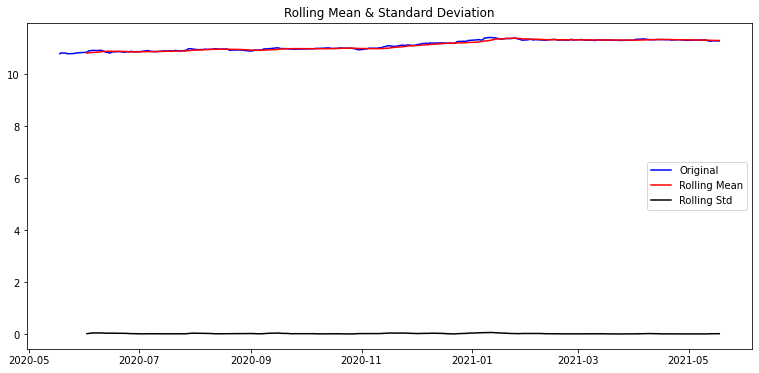

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


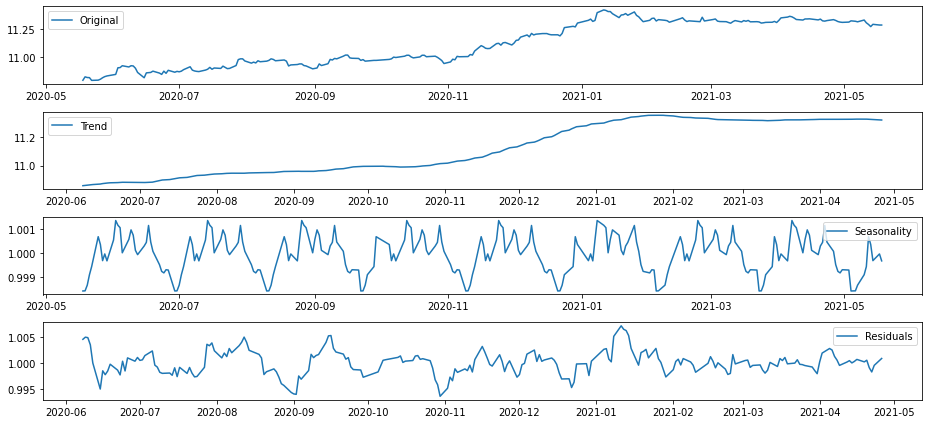

In [45]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [46]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)


Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성
- 학습, 테스트 데이터셋 분리

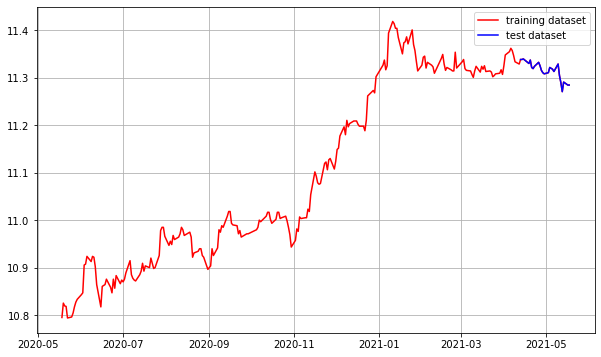

In [47]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

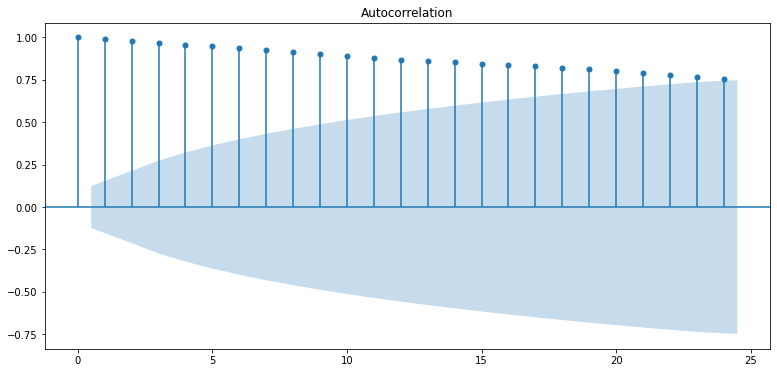

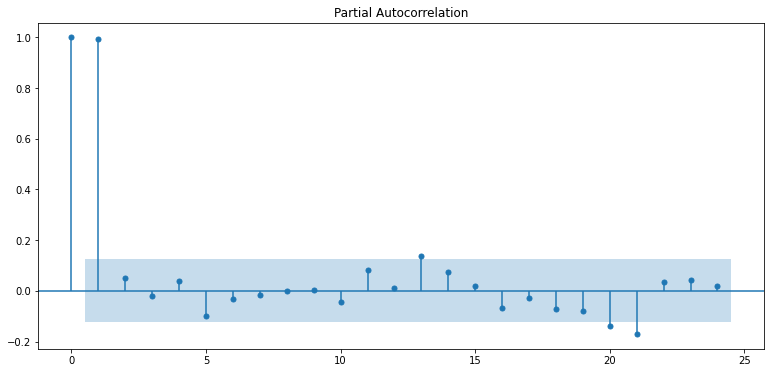

In [48]:
# ACF, PACF 그려보기 -> p,q 구하기


plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


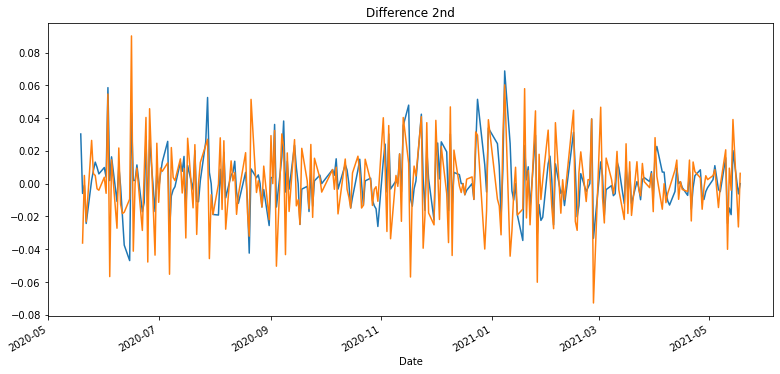

In [49]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [50]:
# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 07 Sep 2021   AIC                          -1164.792
Time:                        14:27:10   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


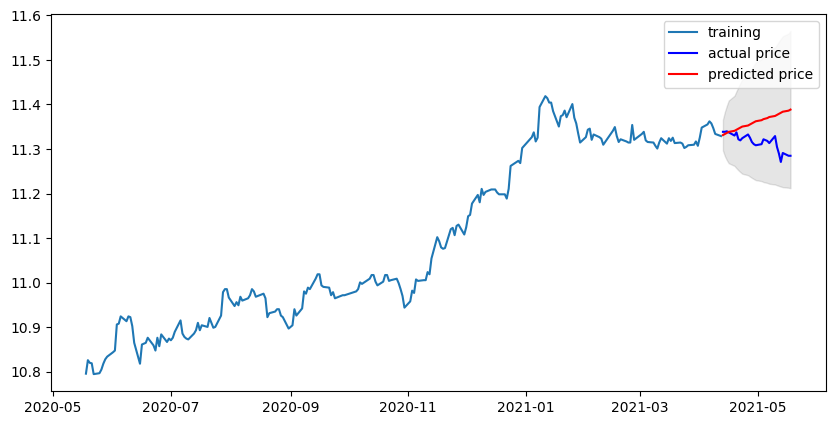

In [51]:

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


In [52]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22087366.126154922
MAE:  3791.3511527213127
RMSE:  4699.719792301976
MAPE: 4.68%


### STEP 7 : 다른 주식 종목 예측해 보기
- 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

새로운 종목 데이터셋 가져오기

$ mkdir -p ~/aiffel/EXPLORATION/14/stock_prediction/data1

Samsung.csv - 삼성 데이터 (210907)

Naver.csv - 네이버 데이터 (210907)

Apple.csv - 애플 데이터 (210907)

Tesla.csv - 테슬라 데이터 (210907)

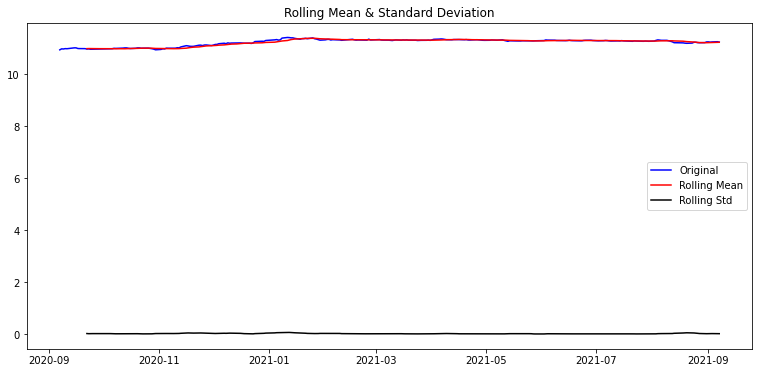

Results of Dickey-Fuller Test:
Test Statistic                  -2.317941
p-value                          0.166247
#Lags Used                       0.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.971511e+00
p-value                        1.931278e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.090000e+02
Critical Value (1%)           -3.462032e+00
Critical Value (5%)           -2.875471e+00
Critical Value (10%)          -2.574195e+00
dtype: float64


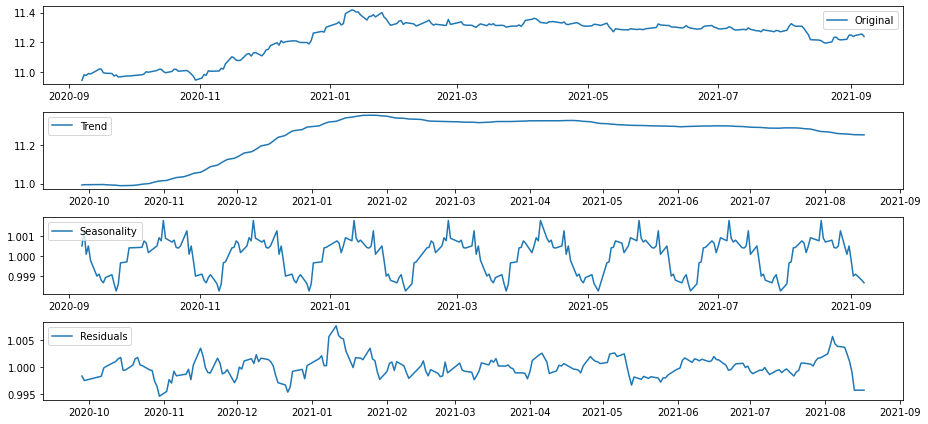

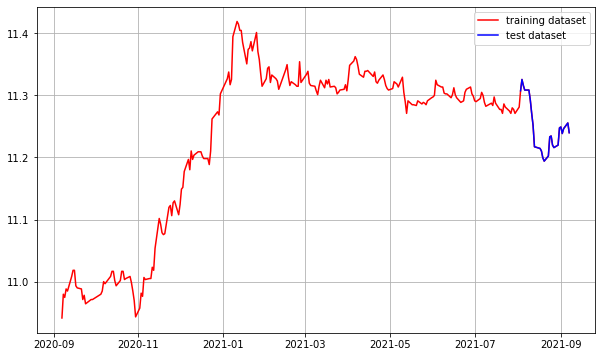

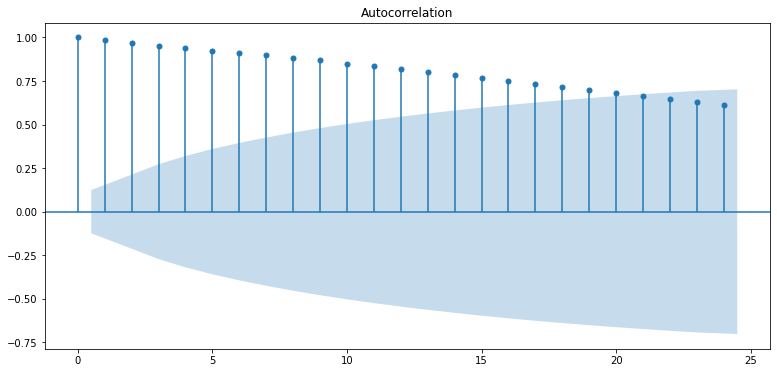

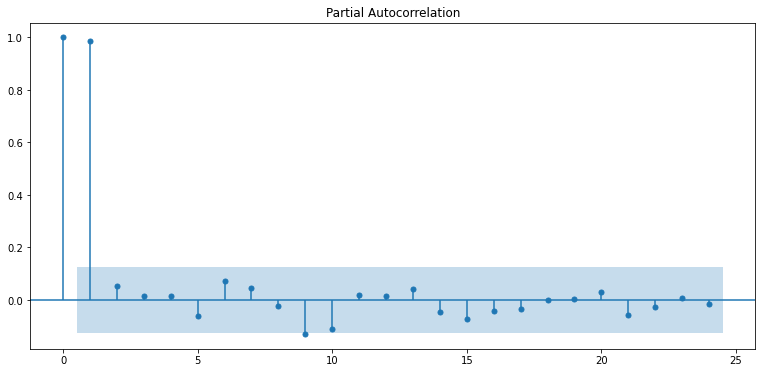

Results of Dickey-Fuller Test:
Test Statistic                -1.144065e+01
p-value                        6.190607e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.169859e+00
p-value                        2.822955e-10
#Lags Used                     1.300000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 622.762
Method:                       css-mle   S.D. of innovat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


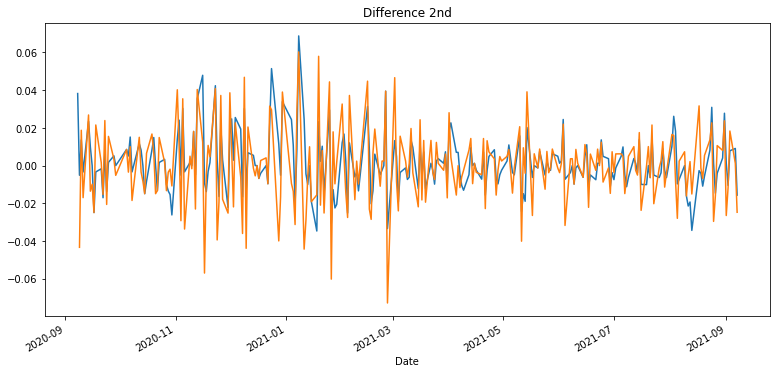

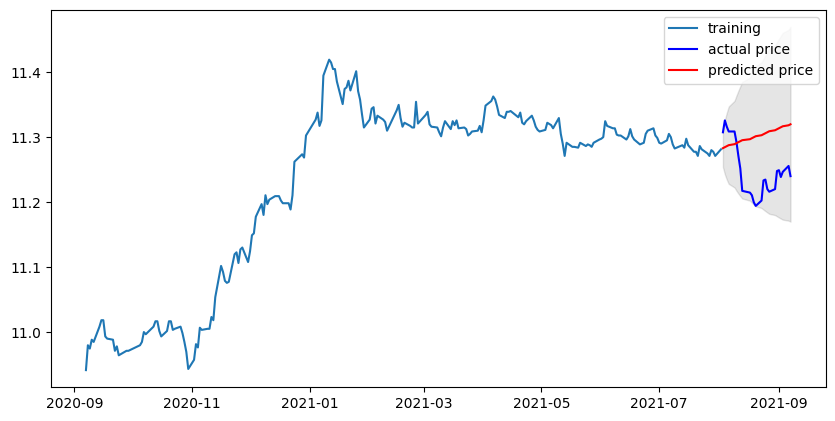

MSE:  29691989.836581055
MAE:  4965.136705014953
RMSE:  5449.035679510738
MAPE: 6.57%


In [55]:
# Samsung.csv 가져오기

# Time Series 생성
dataset_filepath_S = os.getenv('HOME') + '/aiffel/EXPLORATION/14/stock_prediction/data1/Samsung.csv'

df_S = pd.read_csv(dataset_filepath_S, index_col='Date', parse_dates=True)
ts_S = df_S['Close']

ts_S.head()

# 결측치 처리
ts_S=ts_S.interpolate(method='time')
ts_S[ts_S.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts_log_S = np.log(ts_S)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log_S, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log_S)

#시계열 분해 (Time Series Decomposition)

decomposition_S = seasonal_decompose(ts_log_S, model='multiplicative', period = 30) 

trend_S = decomposition_S.trend
seasonal_S = decomposition_S.seasonal
residual_S = decomposition_S.resid

plt.subplot(411)
plt.plot(ts_log_S, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_S, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_S,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_S, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Residual 안정성 확인
residual_S.dropna(inplace=True)
augmented_dickey_fuller_test(residual_S)

#학습, 테스트 데이터셋 분리
train_data_S, test_data_S = ts_log_S[:int(len(ts_log_S)*0.9)], ts_log_S[int(len(ts_log_S)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_S, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_S, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기


plot_acf(ts_log_S)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log_S)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1_S = ts_log_S.diff(periods=1).iloc[1:]
diff_1_S.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_S)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_S = diff_1_S.diff(periods=1).iloc[1:]
diff_2_S.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_S)

# Build and Train  Model
model_S = ARIMA(train_data_S, order=(1, 1, 0))  
fitted_m_S = model_S.fit(disp=-1)  
print(fitted_m_S.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc_S, se, conf = fitted_m_S.forecast(len(test_data_S), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_S = pd.Series(fc_S, index=test_data_S.index)   # 예측결과
lower_series_S = pd.Series(conf[:, 0], index=test_data_S.index)  # 예측결과의 하한 바운드
upper_series_S = pd.Series(conf[:, 1], index=test_data_S.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_S, label='training')
plt.plot(test_data_S, c='b', label='actual price')
plt.plot(fc_series_S, c='r',label='predicted price')
plt.fill_between(lower_series_S.index, lower_series_S, upper_series_S, color='k', alpha=.10)
plt.legend()
plt.show()


mse = mean_squared_error(np.exp(test_data_S), np.exp(fc_S))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_S), np.exp(fc_S))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_S), np.exp(fc_S)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_S) - np.exp(test_data_S))/np.abs(np.exp(test_data_S)))
print('MAPE: {:.2f}%'.format(mape*100))

/aiffel/aiffel/EXPLORATION/14/stock_prediction/data1/Naver.csv


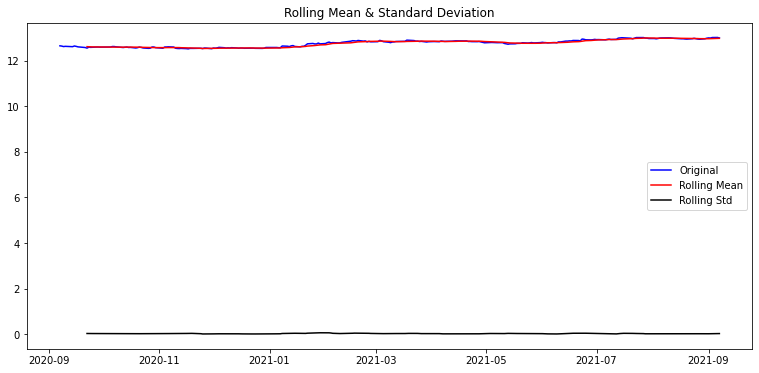

Results of Dickey-Fuller Test:
Test Statistic                  -0.446337
p-value                          0.902070
#Lags Used                       2.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.648641e+00
p-value                        5.188096e-09
#Lags Used                     1.000000e+00
Number of Observations Used    2.170000e+02
Critical Value (1%)           -3.460849e+00
Critical Value (5%)           -2.874953e+00
Critical Value (10%)          -2.573919e+00
dtype: float64


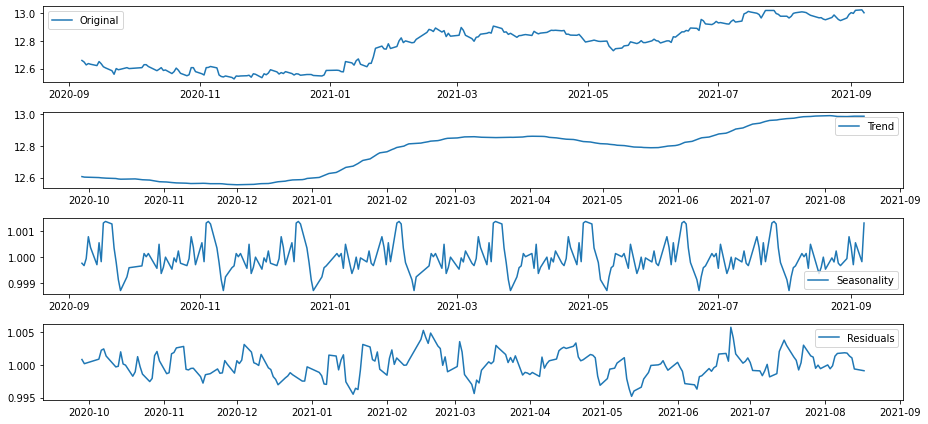

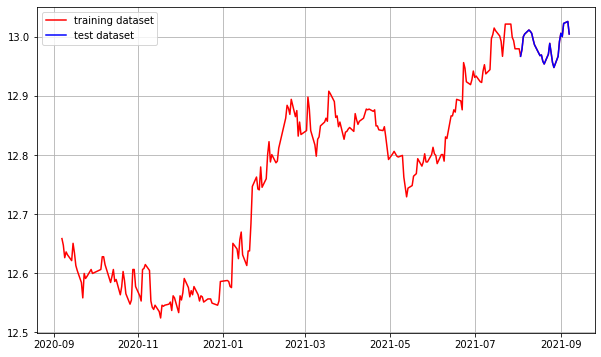

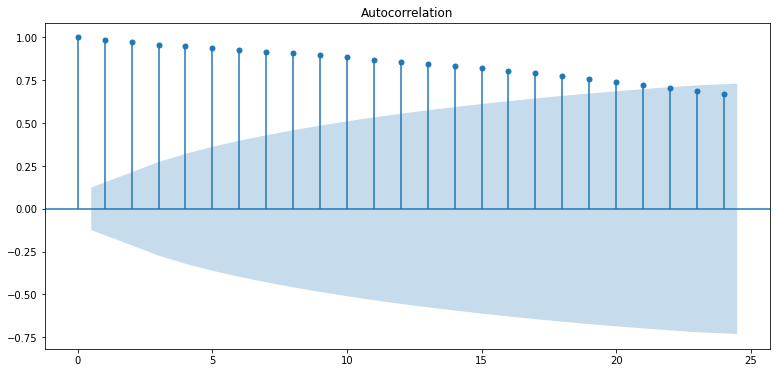

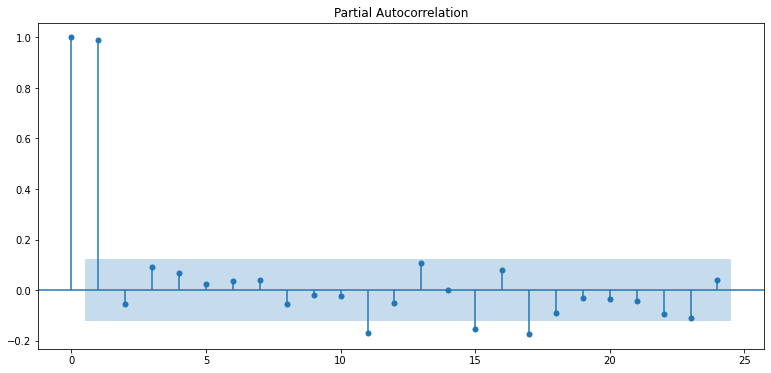

Results of Dickey-Fuller Test:
Test Statistic                -1.276117e+01
p-value                        8.137473e-24
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.133111e+00
p-value                        3.476286e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 548.601
Method:                       css-mle   S.D. of innovat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


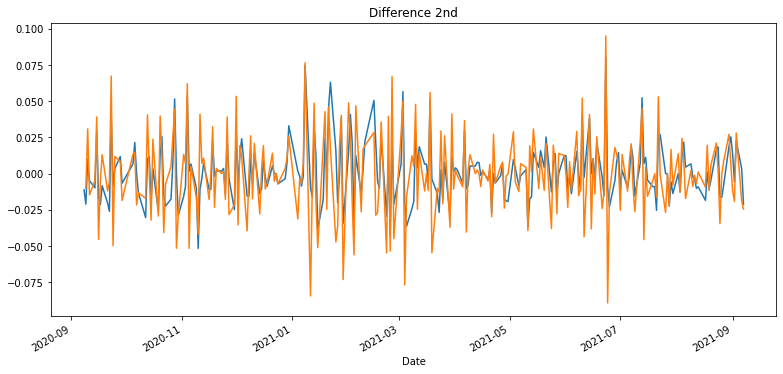

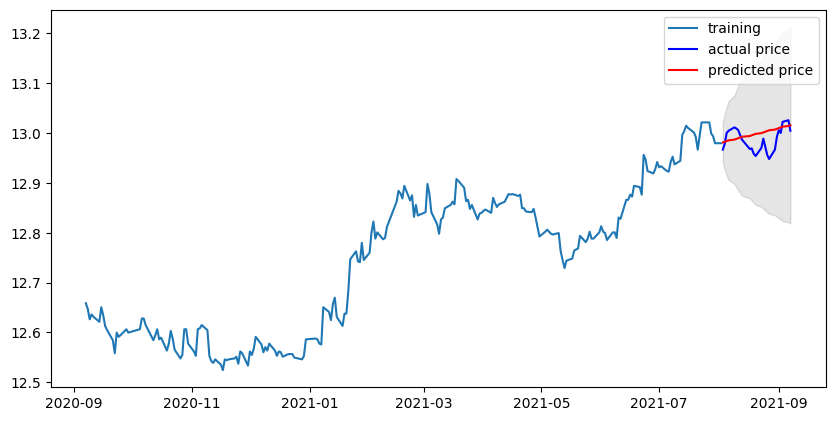

MSE:  128302658.3962728
MAE:  9481.508907127627
RMSE:  11327.07633929748
MAPE: 2.20%


In [59]:
# Naver.csv 가져오기

# Time Series 생성
dataset_filepath_N = os.getenv('HOME') + '/aiffel/EXPLORATION/14/stock_prediction/data1/Naver.csv'

print(dataset_filepath_N)

df_N = pd.read_csv(dataset_filepath_N, index_col='Date', parse_dates=True)
ts_N = df_N['Close']

ts_N.head()

# 결측치 처리
ts_N=ts_N.interpolate(method='time')
ts_N[ts_N.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts_log_N = np.log(ts_N)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log_N, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log_N)

#시계열 분해 (Time Series Decomposition)

decomposition_N = seasonal_decompose(ts_log_N, model='multiplicative', period = 30) 

trend_N = decomposition_N.trend
seasonal_N = decomposition_N.seasonal
residual_N = decomposition_N.resid

plt.subplot(411)
plt.plot(ts_log_N, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_N, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_N,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_N, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Residual 안정성 확인
residual_N.dropna(inplace=True)
augmented_dickey_fuller_test(residual_N)

#학습, 테스트 데이터셋 분리
train_data_N, test_data_N = ts_log_N[:int(len(ts_log_N)*0.9)], ts_log_N[int(len(ts_log_N)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_N, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_N, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기


plot_acf(ts_log_N)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log_N)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1_N = ts_log_N.diff(periods=1).iloc[1:]
diff_1_N.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_N)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_N = diff_1_N.diff(periods=1).iloc[1:]
diff_2_N.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_N)

# Build and Train  Model
model_N = ARIMA(train_data_N, order=(1, 1, 0))  
fitted_m_N = model_N.fit(disp=-1)  
print(fitted_m_N.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc_N, se, conf = fitted_m_N.forecast(len(test_data_N), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_N = pd.Series(fc_N, index=test_data_N.index)   # 예측결과
lower_series_N = pd.Series(conf[:, 0], index=test_data_N.index)  # 예측결과의 하한 바운드
upper_series_N = pd.Series(conf[:, 1], index=test_data_N.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_N, label='training')
plt.plot(test_data_N, c='b', label='actual price')
plt.plot(fc_series_N, c='r',label='predicted price')
plt.fill_between(lower_series_N.index, lower_series_N, upper_series_N, color='k', alpha=.10)
plt.legend()
plt.show()


mse = mean_squared_error(np.exp(test_data_N), np.exp(fc_N))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_N), np.exp(fc_N))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_N), np.exp(fc_N)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_N) - np.exp(test_data_N))/np.abs(np.exp(test_data_N)))
print('MAPE: {:.2f}%'.format(mape*100))

/aiffel/aiffel/EXPLORATION/14/stock_prediction/data1/Apple.csv


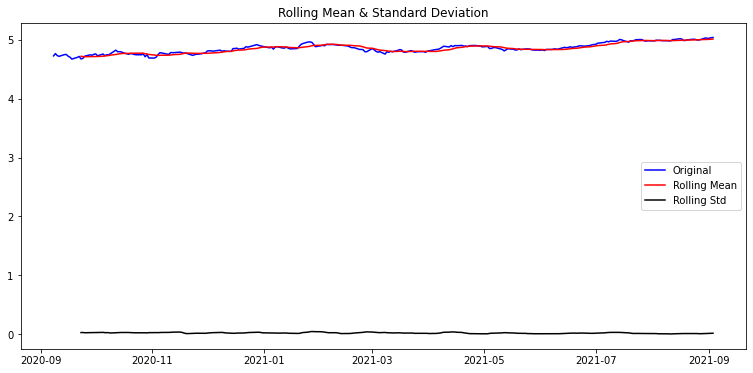

Results of Dickey-Fuller Test:
Test Statistic                  -0.964137
p-value                          0.766119
#Lags Used                       1.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.416770
p-value                          0.000003
#Lags Used                       0.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


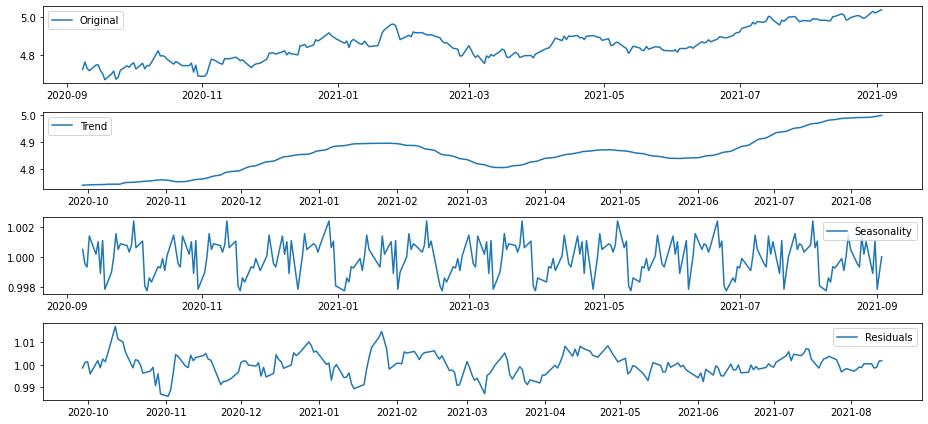

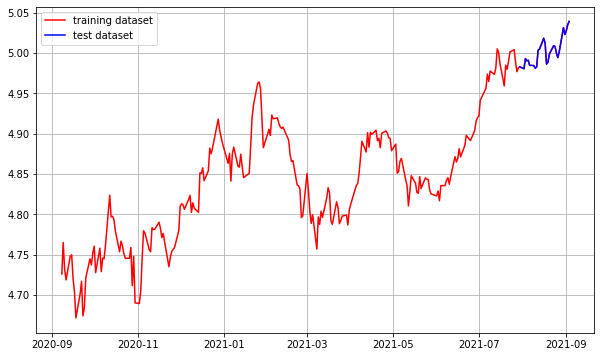

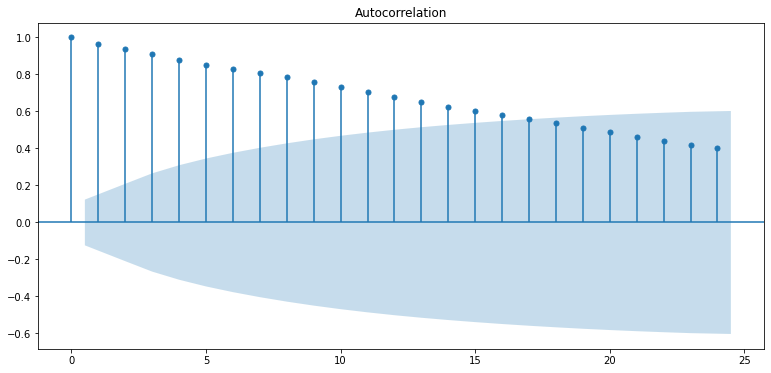

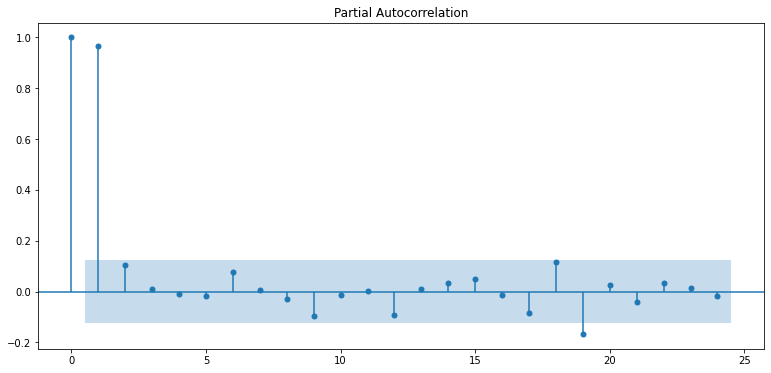

Results of Dickey-Fuller Test:
Test Statistic                -1.773999e+01
p-value                        3.405496e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.201193e+00
p-value                        2.363091e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 569.835
Method:                       css-mle   S.D. of innovat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


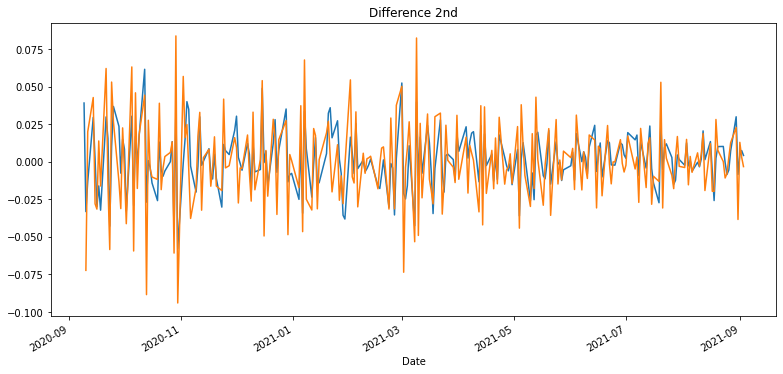

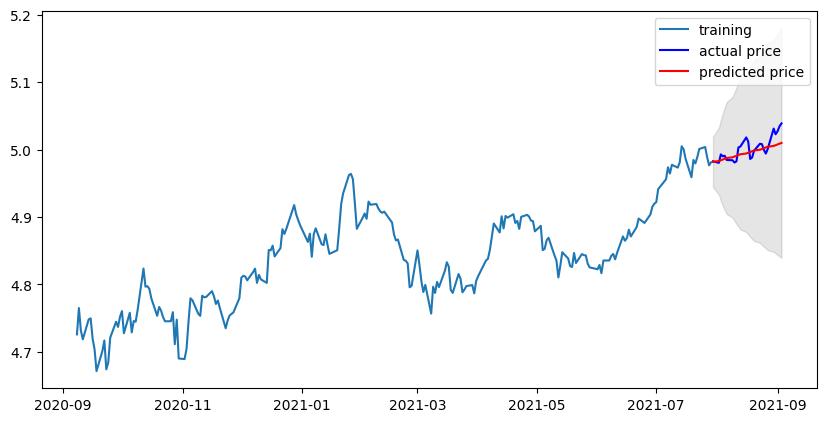

MSE:  4.034801430412081
MAE:  1.5856051803061735
RMSE:  2.0086815154254993
MAPE: 1.05%


In [60]:
# Apple.csv가져오기

# Time Series 생성
dataset_filepath_A = os.getenv('HOME') + '/aiffel/EXPLORATION/14/stock_prediction/data1/Apple.csv'

print(dataset_filepath_A)

df_A = pd.read_csv(dataset_filepath_A, index_col='Date', parse_dates=True)
ts_A = df_A['Close']

ts_A.head()

# 결측치 처리
ts_A=ts_A.interpolate(method='time')
ts_A[ts_A.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts_log_A = np.log(ts_A)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log_A, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log_A)

#시계열 분해 (Time Series Decomposition)

decomposition_A = seasonal_decompose(ts_log_A, model='multiplicative', period = 30) 

trend_A = decomposition_A.trend
seasonal_A = decomposition_A.seasonal
residual_A = decomposition_A.resid

plt.subplot(411)
plt.plot(ts_log_A, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_A, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_A,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_A, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Residual 안정성 확인
residual_A.dropna(inplace=True)
augmented_dickey_fuller_test(residual_A)

#학습, 테스트 데이터셋 분리
train_data_A, test_data_A = ts_log_A[:int(len(ts_log_A)*0.9)], ts_log_A[int(len(ts_log_A)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_A, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_A, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기


plot_acf(ts_log_A)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log_A)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1_A = ts_log_A.diff(periods=1).iloc[1:]
diff_1_A.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_A)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_A = diff_1_A.diff(periods=1).iloc[1:]
diff_2_A.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_A)

# Build and Train  Model
model_A = ARIMA(train_data_A, order=(1, 1, 0))  
fitted_m_A = model_A.fit(disp=-1)  
print(fitted_m_A.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc_A, se, conf = fitted_m_A.forecast(len(test_data_A), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_A = pd.Series(fc_A, index=test_data_A.index)   # 예측결과
lower_series_A = pd.Series(conf[:, 0], index=test_data_A.index)  # 예측결과의 하한 바운드
upper_series_A = pd.Series(conf[:, 1], index=test_data_A.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_A, label='training')
plt.plot(test_data_A, c='b', label='actual price')
plt.plot(fc_series_A, c='r',label='predicted price')
plt.fill_between(lower_series_A.index, lower_series_A, upper_series_A, color='k', alpha=.10)
plt.legend()
plt.show()


mse = mean_squared_error(np.exp(test_data_A), np.exp(fc_A))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_A), np.exp(fc_A))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_A), np.exp(fc_A)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_A) - np.exp(test_data_A))/np.abs(np.exp(test_data_A)))
print('MAPE: {:.2f}%'.format(mape*100))

/aiffel/aiffel/EXPLORATION/14/stock_prediction/data1/Tesla.csv


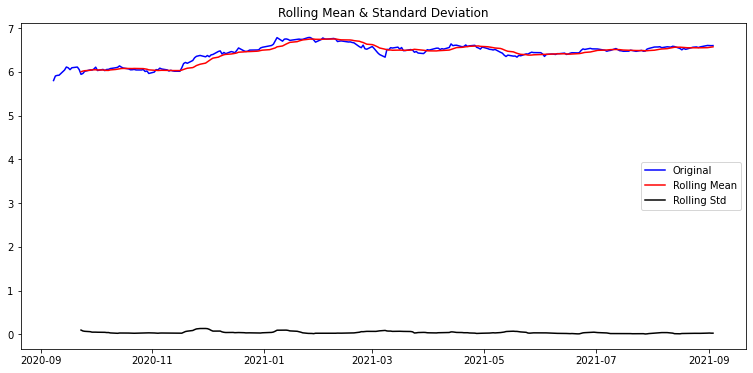

Results of Dickey-Fuller Test:
Test Statistic                  -2.710861
p-value                          0.072178
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.105330
p-value                          0.000014
#Lags Used                       0.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


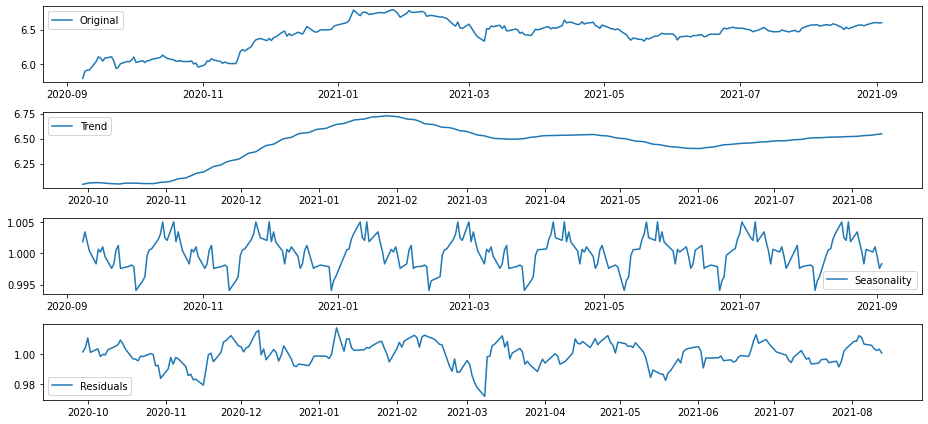

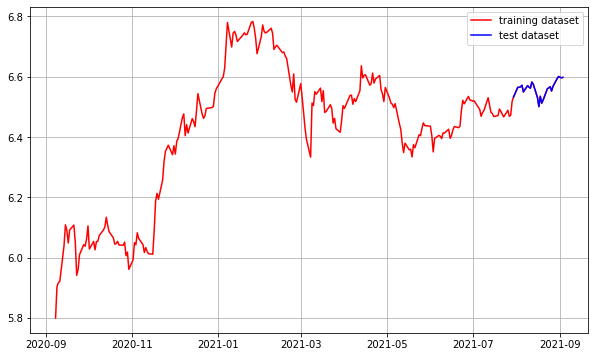

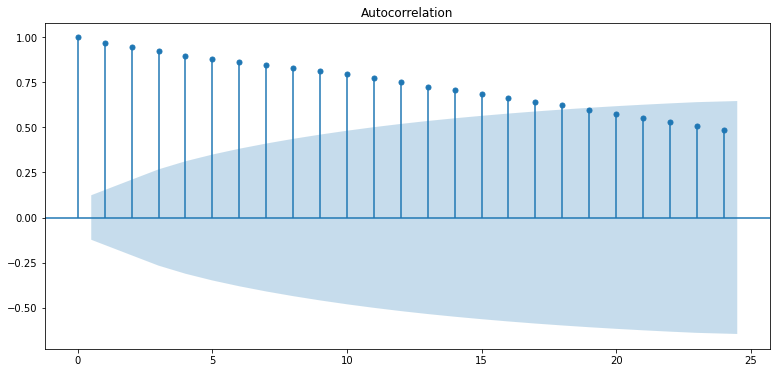

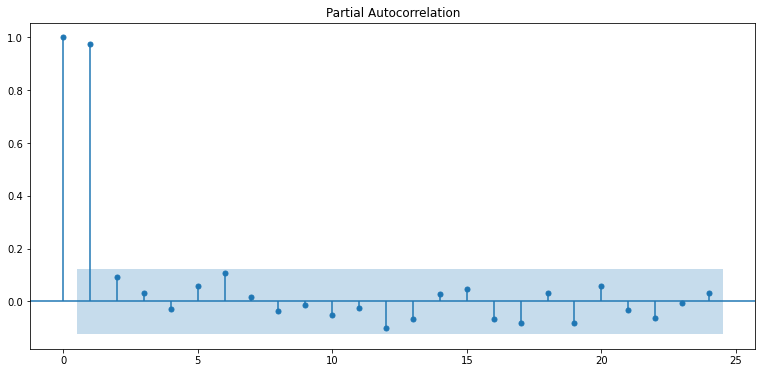

Results of Dickey-Fuller Test:
Test Statistic                -1.637067e+01
p-value                        2.812385e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.102374e+01
p-value                        5.898900e-20
#Lags Used                     7.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 414.678
Method:                       css-mle   S.D. of innovat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


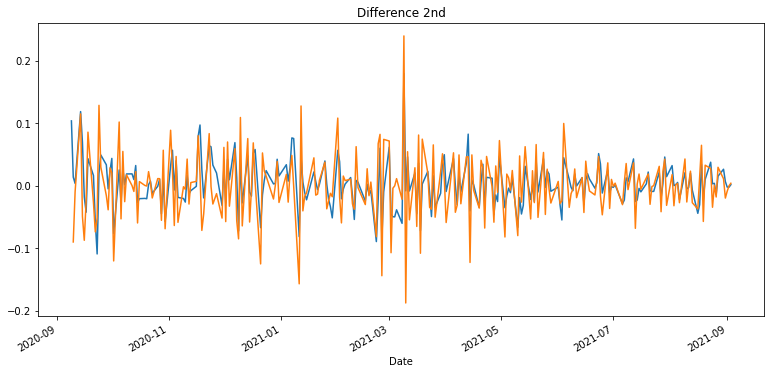

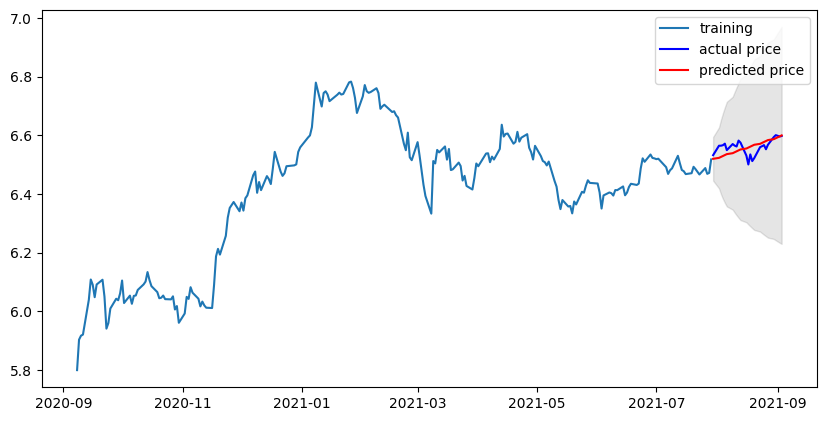

MSE:  389.4746714952593
MAE:  16.620260166409174
RMSE:  19.735112654739503
MAPE: 2.38%


In [61]:
# Tesla.csv가져오기

# Time Series 생성
dataset_filepath_T = os.getenv('HOME') + '/aiffel/EXPLORATION/14/stock_prediction/data1/Tesla.csv'

print(dataset_filepath_T)

df_T = pd.read_csv(dataset_filepath_T, index_col='Date', parse_dates=True)
ts_T = df_T['Close']

ts_T.head()

# 결측치 처리
ts_T=ts_T.interpolate(method='time')
ts_T[ts_T.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts_log_T = np.log(ts_T)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log_T, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log_T)

#시계열 분해 (Time Series Decomposition)

decomposition_T = seasonal_decompose(ts_log_T, model='multiplicative', period = 30) 

trend_T = decomposition_T.trend
seasonal_T = decomposition_T.seasonal
residual_T = decomposition_T.resid

plt.subplot(411)
plt.plot(ts_log_T, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_T, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_T,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_T, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Residual 안정성 확인
residual_T.dropna(inplace=True)
augmented_dickey_fuller_test(residual_T)

#학습, 테스트 데이터셋 분리
train_data_T, test_data_T = ts_log_T[:int(len(ts_log_T)*0.9)], ts_log_T[int(len(ts_log_T)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_T, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_T, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기


plot_acf(ts_log_T)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log_T)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1_T = ts_log_T.diff(periods=1).iloc[1:]
diff_1_T.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_T)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_T = diff_1_T.diff(periods=1).iloc[1:]
diff_2_T.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_T)

# Build and Train  Model
model_T = ARIMA(train_data_T, order=(1, 1, 0))  
fitted_m_T = model_T.fit(disp=-1)  
print(fitted_m_T.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc_T, se, conf = fitted_m_T.forecast(len(test_data_T), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_T = pd.Series(fc_T, index=test_data_T.index)   # 예측결과
lower_series_T = pd.Series(conf[:, 0], index=test_data_T.index)  # 예측결과의 하한 바운드
upper_series_T = pd.Series(conf[:, 1], index=test_data_T.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_T, label='training')
plt.plot(test_data_T, c='b', label='actual price')
plt.plot(fc_series_T, c='r',label='predicted price')
plt.fill_between(lower_series_T.index, lower_series_T, upper_series_T, color='k', alpha=.10)
plt.legend()
plt.show()


mse = mean_squared_error(np.exp(test_data_T), np.exp(fc_T))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_T), np.exp(fc_T))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_T), np.exp(fc_T)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_T) - np.exp(test_data_T))/np.abs(np.exp(test_data_T)))
print('MAPE: {:.2f}%'.format(mape*100))